## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np



# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
df = study_results.merge(mouse_metadata, how="inner", on="Mouse ID")

# Display the data table for preview
df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
# Checking the number of mice.
df["Mouse ID"].nunique()


249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

dup_id = df[df.duplicated(["Mouse ID", "Timepoint"])]["Mouse ID"].iloc[0]
dup_id

'g989'

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
df[df["Mouse ID"] == dup_id]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
df = df[df["Mouse ID"] != dup_id]

In [6]:
# Checking the number of mice in the clean DataFrame.
df["Mouse ID"].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.



In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function

df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

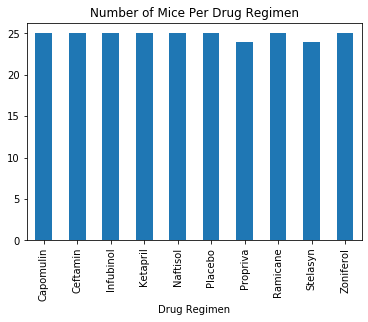

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

df.groupby("Drug Regimen")["Mouse ID"].nunique().plot.bar()
plt.title("Number of Mice Per Drug Regimen");

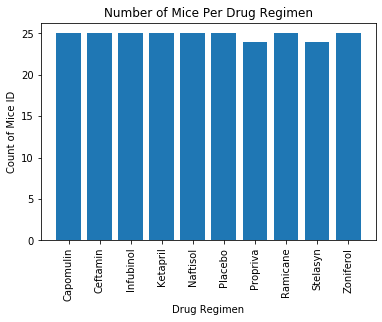

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
data = df.groupby("Drug Regimen")["Mouse ID"].nunique()
plt.bar(data.index, data)
plt.xlabel("Drug Regimen")
plt.ylabel("Count of Mice ID")
plt.xticks(rotation=90);

plt.title("Number of Mice Per Drug Regimen");

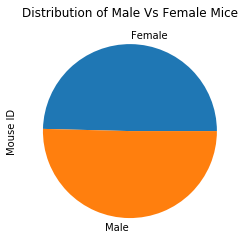

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

df.groupby("Sex")["Mouse ID"].nunique().plot.pie()

plt.title("Distribution of Male Vs Female Mice");

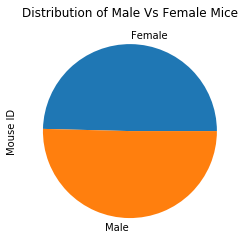

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
data = df.groupby("Sex")["Mouse ID"].nunique()

plt.pie(data, labels={"Female", "Male"})
plt.ylabel("Mouse ID");

plt.title("Distribution of Male Vs Female Mice");


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
df = df.merge(df.sort_values("Timepoint").groupby(["Mouse ID"]).last()["Tumor Volume (mm3)"].rename("Final Volume"),
         left_on=("Mouse ID"), right_index=True)
df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Final Volume
0,b128,0,45.000000,0,Capomulin,Female,9,22,38.982878
1,b128,5,45.651331,0,Capomulin,Female,9,22,38.982878
2,b128,10,43.270852,0,Capomulin,Female,9,22,38.982878
3,b128,15,43.784893,0,Capomulin,Female,9,22,38.982878
4,b128,20,42.731552,0,Capomulin,Female,9,22,38.982878


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = df["Drug Regimen"].unique()


# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
df = df.merge(df.groupby("Drug Regimen")["Final Volume"].quantile(.25).rename("Low IQR"), left_on="Drug Regimen",right_index=True)
    
df = df.merge(df.groupby("Drug Regimen")["Final Volume"].quantile(0.75).rename("Upper IQR"), left_on="Drug Regimen",right_index=True)

    
df.groupby("Drug Regimen")[["Low IQR", "Upper IQR"]].first()
    

,Low IQR,Upper IQR
Drug Regimen,,
Capomulin,32.377357,40.159220
Ceftamin,59.741901,64.729837
Infubinol,57.031862,66.196912
Ketapril,62.909441,73.715619
Naftisol,62.670759,73.051363
Placebo,58.011146,69.823146
Propriva,55.341834,64.957562
Ramicane,31.095335,38.810366
Stelasyn,59.131023,70.653832


In [15]:
   # Determine outliers using upper and lower bounds
df["Outlier"] = 0
df.loc[ df["Final Volume"] < df["Low IQR"]-(1.5*(df["Upper IQR"] - df["Low IQR"])), "Outlier" ] = 1

df.loc[ df["Final Volume"] > df["Upper IQR"]+(1.5*(df["Upper IQR"] - df["Low IQR"])), "Outlier" ] = 1

#select Outliers
df[df["Outlier"]==1].head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Final Volume,Low IQR,Upper IQR,Outlier
10,f932,0,45.000000,0,Ketapril,Male,15,29,45.000000,62.909441,73.715619,1
407,h428,0,45.000000,0,Ketapril,Female,1,27,45.000000,62.909441,73.715619,1
68,z234,0,45.000000,0,Naftisol,Female,19,27,46.129357,62.670759,73.051363,1
69,z234,5,46.129357,1,Naftisol,Female,19,27,46.129357,62.670759,73.051363,1
145,x336,0,45.000000,0,Naftisol,Female,4,29,45.000000,62.670759,73.051363,1


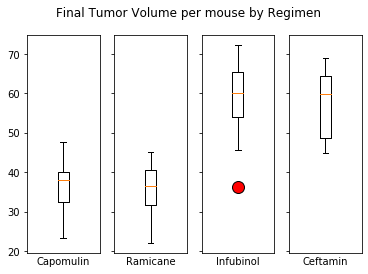

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig, ax = plt.subplots(nrows=1, ncols=4, sharey=True)
data = df.groupby("Mouse ID").last()
for i,drug in enumerate(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]):
    subset = data[data["Drug Regimen"]==drug]
    ax[i].boxplot( subset["Final Volume"], flierprops={"markerfacecolor":"red", "markersize":12})
    ax[i].set_xlabel(drug)
    ax[i].set_xticks([])

fig.suptitle("Final Tumor Volume per mouse by Regimen");

## Line and Scatter Plots

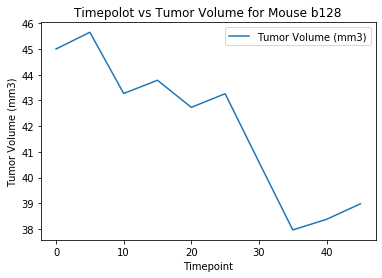

In [17]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
df[df["Mouse ID"] == "b128"].plot("Timepoint", "Tumor Volume (mm3)")

plt.ylabel("Tumor Volume (mm3)")
plt.title("Timepolot vs Tumor Volume for Mouse b128");


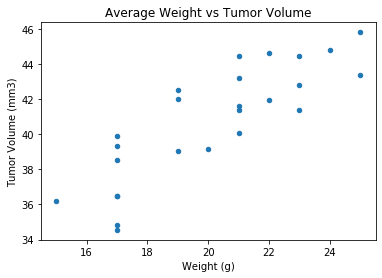

In [18]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
df[df["Drug Regimen"]=="Capomulin"].groupby("Mouse ID").mean().plot.scatter("Weight (g)", "Tumor Volume (mm3)")

plt.title("Average Weight vs Tumor Volume");


## Correlation and Regression

In [19]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

data = df[df["Drug Regimen"]=="Capomulin"].groupby("Mouse ID").mean()
correlation = data.corr().loc["Weight (g)", "Tumor Volume (mm3)"]
print(f"Correlation between average weight and average tumor volume: {correlation}")

Correlation between average weight and average tumor volume: 0.8419363424694718


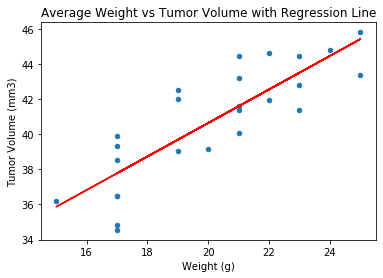

In [20]:
x = data["Weight (g)"]
y = data["Tumor Volume (mm3)"]

slope, intercept, r, p, stderror = st.linregress(x, y)

df[df["Drug Regimen"]=="Capomulin"].groupby("Mouse ID").mean().plot.scatter("Weight (g)", "Tumor Volume (mm3)")

plt.plot(x, slope*x + intercept, "r")

plt.title("Average Weight vs Tumor Volume with Regression Line");

